# Fake News Classifier

- Name: Sunder Thyagarajan & Ravi Katta
- Student ID: 011528062 & 012127011

## Contributions

* ### Sunder Thyagarajan : Complex Features : Context, Spam
    - ####  Data Preparation
    - ####  Data Observation
    - ####  Data Visualization
    - ####  Featured Extraction, 
    - ####  Classification, 
    - ####  Distillation 
            - LDA 
            - LDA2Vec
            - DOC2VEC
            - Word2Vec
            - MeanEmbeddingVectorizer
            - Topic Modeling
            - Sentiment Analysis
    - ####  Extract Feature Vector
    - ####  Tag Documents using the Label
    - ####  DOC2VEC on Tagged Documents
    - ####  Concat distilled vectors with  LDA and Sentiment
    - ####  Classification
       -  Naives Bayes regression
       -  Logistic regression
       -  Linear SVM Classifier
       -  SVM Stochastic Gradient Descent on hinge loss
       -  RandomForestClassifier
    - ####  Validation
       -  K-Fold cross validation

* ### Ravi Katta : Complex Features : Clickbait, Spam
    - ####  Data Preparation
    - ####  Data Observation
    - ####  Data Visualization
    - ####  Featured Extraction, 
    - ####  Classification, 
    - ####  Distillation 
            - LDA 
            - LDA2Vec
            - DOC2VEC
            - Word2Vec
            - MeanEmbeddingVectorizer
            - Topic Modeling
            - Sentiment Analysis
    - ####  Extract Feature Vector
    - ####  Tag Documents using the Label
    - ####  DOC2VEC on Tagged Documents
    - ####  Concat distilled vectors with  LDA and Sentiment
    - ####  Classification
       -  Naives Bayes regression
       -  Logistic regression
       -  Linear SVM Classifier
       -  SVM Stochastic Gradient Descent on hinge loss
       -  RandomForestClassifier
    - ####  Validation
       -  K-Fold cross validation

## Business Problem

Social media for news consumption is a double-edged sword.
On the one hand, its low cost, easy access, and rapid dissemination
of information lead people to seek out and consume
news from social media. On the other hand, it enables the
wide spread of “fake news”, i.e., low quality news with intentionally
false information. The extensive spread of fake
news has the potential for extremely negative impacts on
individuals and society. Therefore, fake news detection on
social media has recently become an emerging research that
is attracting tremendous attention. 

In [1]:
## ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Dataset selection and observation

In [2]:
import pandas as pd
import csv
import numpy as np

#### Define Dataset

In [3]:
test_filename = 'input_data/test.tsv'
train_filename = 'input_data/train.tsv'
valid_filename = 'input_data/valid.tsv'

#### Define Columns names as part of dataset

In [4]:
colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 
            'speakerjobtitle', 'stateinfo','partyaffiliation', 
            'barelytruecounts', 'falsecounts','halftruecounts',
            'mostlytrueocounts','pantsonfirecounts','context']
headlinecolname = 'headline_text'
labelcolname = 'encoded_label'
processedheadlinecolname = 'processed_headline_text'

#### Function to simplify label classes

* Original --	True
* True	--	True
* Mostly-true	-- True
* Half-true	-- True
* Barely-true	-- False
* False	-- False
* Pants-fire	-- False

In [5]:
true_labels = ['original','true','mostly-true','half-true']
false_labels = ['barely-true','false','pants-fire']
def simplify_label(input_label):
    if input_label in true_labels:
        return 1
    else:
        return 0

#### Read the input data files

In [6]:
train_news = pd.read_csv(train_filename, sep='\t', names = colnames,error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = colnames,error_bad_lines=False)
valid_news = pd.read_csv(valid_filename, sep='\t', names = colnames,error_bad_lines=False)

train_news.head()
#train_news['context'].unique()
#test_news['context'].unique()
#valid_news['context'].unique()

labelcolname = 'encoded_label'

train_news[labelcolname] = train_news.apply(lambda row: simplify_label(row['label']), axis=1)
test_news[labelcolname] = test_news.apply(lambda row: simplify_label(row['label']), axis=1)
valid_news[labelcolname] = valid_news.apply(lambda row: simplify_label(row['label']), axis=1)

## Data Preprocessing

We will perform the following steps:
* All stopwords are removed.
* Words that have fewer than 3 characters are removed.
* Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
* Words are stemmed — words are reduced to their root form.
* Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.

In [7]:
import string
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rajisunder/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Remove Stopwords and shortwords using nltk stopwords

In [8]:
sw = stopwords.words('english')
#Remove stop words
def remove_stop_and_short_words(text):
    text = [word.lower() for word in text.split() if (word.lower() not in sw) and (len(word)>3)]
    return " ".join(text)

#### Spell Check

Use Google News library to build dictionary and compare the dataset

In [9]:
# model = gensim.models.KeyedVectors.load_word2vec_format('libraries/GoogleNews-vectors-negative300.bin.gz', binary=True)
# words = model.index2word

# w_rank = {}
# for i,word in enumerate(words):
#     w_rank[word] = i

# WORDS = w_rank

In [10]:
# import re
# from collections import Counter

# def words(text): return re.findall(r'\w+', text.lower())

# def P(word, N=sum(WORDS.values())): 
#     "Probability of `word`."
#     return - WORDS.get(word, 0)

# def correction(word): 
#     "Most probable spelling correction for word."
#     return max(candidates(word), key=P)

# def candidates(word): 
#     "Generate possible spelling corrections for word."
#     return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

# def known(words): 
#     "The subset of `words` that appear in the dictionary of WORDS."
#     return set(w for w in words if w in WORDS)

# def edits1(word):
#     "All edits that are one edit away from `word`."
#     letters    = 'abcdefghijklmnopqrstuvwxyz'
#     splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
#     deletes    = [L + R[1:]               for L, R in splits if R]
#     transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
#     replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
#     inserts    = [L + c + R               for L, R in splits for c in letters]
#     return set(deletes + transposes + replaces + inserts)

# def edits2(word): 
#     "All edits that are two edits away from `word`."
#     return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [11]:
# def spell_checker(text):
#     all_words = re.findall(r'\w+', text.lower()) #tokenize to words
#     spell_checked_text  = []
#     for i in range(len(all_words)):
#         if correction(all_words[i]) and (not correction(all_words[i]).isspace()):
#             spell_checked_text.append(correction(all_words[i]))
#     return " ".join(spell_checked_text)

#### Lemmatization using Wordnet Lemmatizer and Stemming using SnowBall Stemmer

In [12]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

#### Remove Punctuations using nltk

In [13]:
#method to remove punctuations from textual data
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

#### Preprocess text function
This function makes use of all the functions above but spell check as it takes long time

In [14]:
def process_data(text):
    #print ('Input Text :: ' + text)
    text = remove_stop_and_short_words(text)
    #print('Stopwords and short words removed :: ' + text)
    text = lemmatize_stemming(text)
    #print('Lemmatized :: ' + text)
    text = remove_punctuation(text)
    #print('Punctuation removed :: ' + text)
    return text

In [15]:
print (process_data(train_news['headline_text'][0]))
process_data(train_news['headline_text'][4])

says annies list political group supports thirdtrimester abortions demand


'economic turnaround started term'

#### Preprocess text function with spell check
This function makes use of all the functions above includes spell check if we have time

In [16]:
# def process_data_spellcorrect(text):
#     #print ('Input Text :: ' + text)
#     text = remove_stop_and_short_words(text)
#     #print('Stopwords and short words removed :: ' + text)
#     text = spell_checker(text)
#     #print('Stopwords and short words removed :: ' + text)
#     text = lemmatize_stemming(text)
#     #print('Lemmatized :: ' + text)
#     text = remove_punctuation(text)
#     #print('Punctuation removed :: ' + text)
#     return " ".join(text)

In [17]:
# process_spellcorrect(train_news[headlinecolname][0])

#### Apply Preprocessing and spellcorrection to dataset

In [18]:
train_news['index'] = train_news.index
train_news[processedheadlinecolname] = train_news.apply(lambda row: process_data(row[headlinecolname]), axis=1)
train_news.head()

test_news['index'] = test_news.index
test_news[processedheadlinecolname] = test_news.apply(lambda row: process_data(row[headlinecolname]), axis=1)
test_news.head()

valid_news['index'] = valid_news.index
valid_news[processedheadlinecolname] = valid_news.apply(lambda row: process_data(row[headlinecolname]), axis=1)
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocounts,pantsonfirecounts,context,encoded_label,index,processed_headline_text
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,0,0,less americans working 70s
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,1,obama sworn office holy bible instead kuran th...
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,2,says organizations parading social welfare org...
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,1,3,says nearly half oregons children poor
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,1,4,attacks republicans various programs economic ...


In [19]:
train_news.to_csv("enriched_data/train_cleantext.csv", sep=',')
test_news.to_csv("enriched_data/test_cleantext.csv", sep=',')
valid_news.to_csv("enriched_data/valid_cleantext.csv", sep=',')

## Visualization functions

#### Function to create a distribution on desired column
This function is used against semisupervised topics labels to observe distribution of news categories

In [20]:
import seaborn as sb
def create_distribution(dataFile, colname):
    g = sb.countplot(x=colname, data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g


In [21]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
##Printing the rod cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS  #install $ pip install wordcloud

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(12.0,8.0), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    mp.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        mp.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        mp.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'top'})
    else:
        mp.imshow(wordcloud);
        mp.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    mp.axis('off');
    mp.tight_layout()  

In [22]:
import matplotlib.pyplot as plt
#Word Cloud to Visualize important text
# lower max_font_size, change the maximum number of word and lighten the background
def create_word_cloud(dataframe, colname, title):
    plot_wordcloud(dataframe[colname],  max_words=300000, max_font_size=300, title=title)


In [23]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#KMeans representation of Doc2Vec model
def kmeans_cluster_visualization(doc2vec_model,nmcluster=6):
    kmeans_model = KMeans(n_clusters=nmcluster, init='k-means++', max_iter=100)  
    X = kmeans_model.fit(doc2vec_model.docvecs.doctag_syn0)
    labels=kmeans_model.labels_.tolist()

    l = kmeans_model.fit_predict(doc2vec_model.docvecs.doctag_syn0)
    pca = PCA(n_components=2).fit(doc2vec_model.docvecs.doctag_syn0)
    datapoint = pca.transform(doc2vec_model.docvecs.doctag_syn0)

    plt.figure
    label1 = ["#FFFF00", "#008000", "#0000FF", "#800080", "#800081", "#800082"]
    color = [label1[i] for i in labels]
    plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

    centroids = kmeans_model.cluster_centers_
    centroidpoint = pca.transform(centroids)
    plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='o', s=150, c='#000000')
    plt.show()

#### Visualization : t-SNE

In [24]:
#"Creates and TSNE model and plots it"
from sklearn.manifold import TSNE
def tsne_plot(model,figX,figY):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(figX, figY)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [25]:
#Method to calculate model accuracy, precision
#Method to calculate model accuracy, precision
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def estimate_score(y_test, y_pred):
    score(y_test, y_pred, average='macro')
    precision, recall, fscore, support = score(y_test, y_pred)
    
    print('accuracy: {}'.format(accuracy_score(y_test,y_pred)*100))
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))

### Data Observation

#### Distribution of classes for prediction

By calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes

In [153]:
def create_distribution(dataFile):
    return sb.countplot(x=labelcolname, data=dataFile, palette='hls')

#### Distribution for Train News

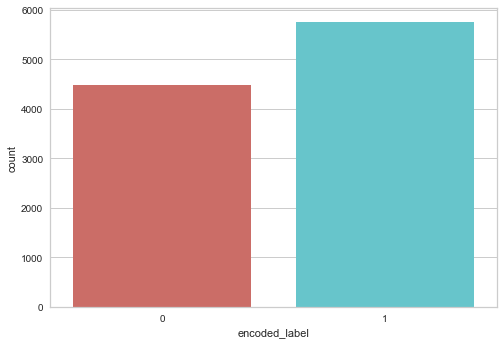

In [154]:
create_distribution(train_news)

#### Distribution for Test News

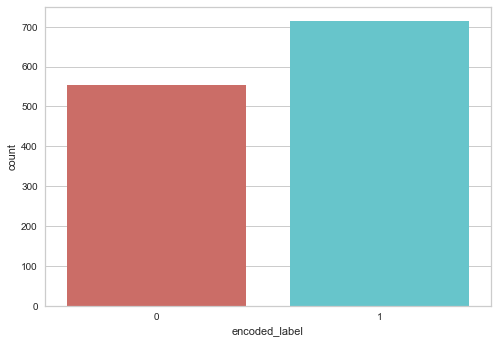

In [155]:
create_distribution(test_news)

#### Distribution for Validate News

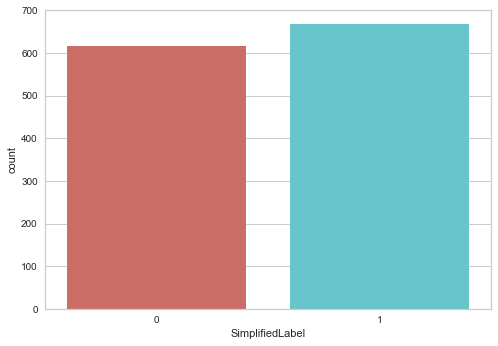

In [154]:
create_distribution(valid_news)

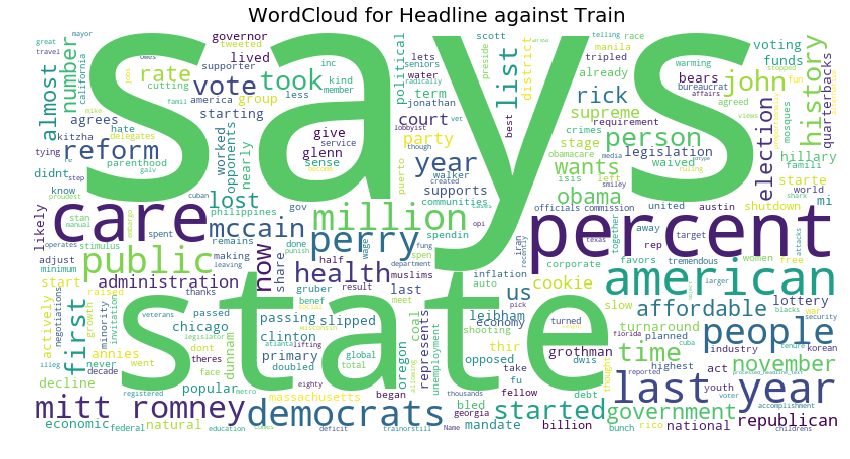

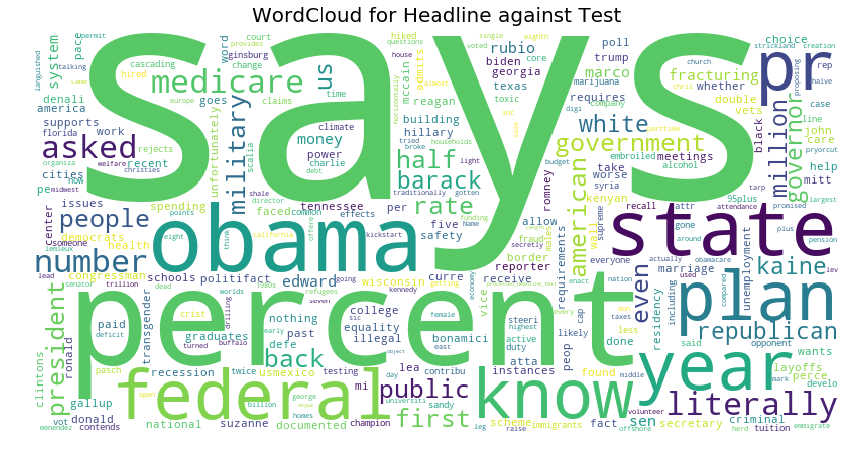

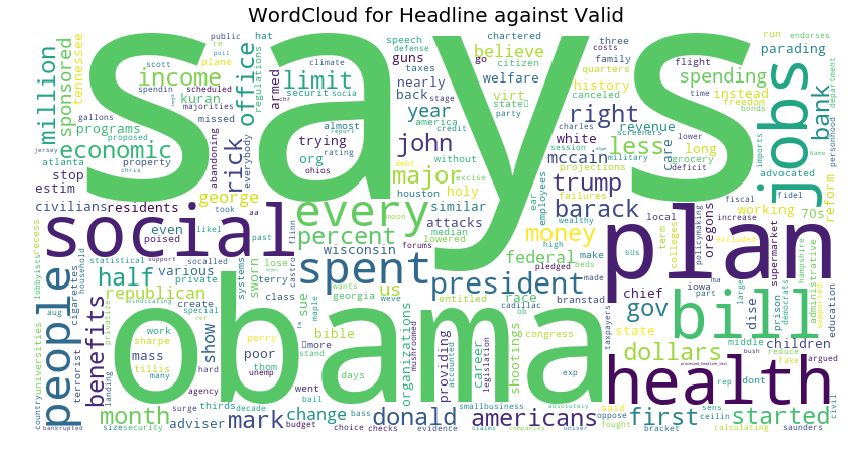

In [26]:
create_word_cloud(train_news,processedheadlinecolname,'WordCloud for Headline against Train')
create_word_cloud(test_news,processedheadlinecolname,'WordCloud for Headline against Test')
create_word_cloud(valid_news,processedheadlinecolname,'WordCloud for Headline against Valid')

## Distillation - Sentiment Analysis

In [27]:
import nltk.sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

In [28]:
snt = senti.polarity_scores(train_news[processedheadlinecolname][0])
print("{:-<40} \n{}".format([processedheadlinecolname][0], str(snt)))
print ([snt['neg'],snt['neu'],snt['pos']])
print (snt['compound'])

processed_headline_text----------------- 
{'neg': 0.136, 'neu': 0.636, 'pos': 0.227, 'compound': 0.25}
[0.136, 0.636, 0.227]
0.25


In [29]:
def identify_sentiment_on_text(text):
    snt = senti.polarity_scores(text)
    # print("{:-<40} \n{}".format(text, str(snt)))
    # print ([snt['neg'],snt['neu'],snt['pos']])
    # print (snt['compound'])
    return pd.Series([snt['compound'], [snt['neg'],snt['neu'],snt['pos']]])

In [30]:
def update_sentiment_results_to_dataset(dataframe,sentimentcolnames,coltoapplysentiment):
    dataframe[sentimentcolnames] = dataframe.apply(
    lambda row: identify_sentiment_on_text(
        row[coltoapplysentiment]), axis=1)
    return dataframe

In [31]:
sentimentcolnames = ['headline_sentiment_compound','headline_sentiment_polarity_vector']
train_news = update_sentiment_results_to_dataset(train_news,sentimentcolnames,processedheadlinecolname)
train_news.head()

test_news = update_sentiment_results_to_dataset(test_news,sentimentcolnames,processedheadlinecolname)
test_news.head()

valid_news = update_sentiment_results_to_dataset(valid_news,sentimentcolnames,processedheadlinecolname)
valid_news.head()


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocounts,pantsonfirecounts,context,encoded_label,index,processed_headline_text,headline_sentiment_compound,headline_sentiment_polarity_vector
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,0,0,less americans working 70s,0.0000,"[0.0, 1.0, 0.0]"
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,1,obama sworn office holy bible instead kuran th...,0.0000,"[0.0, 1.0, 0.0]"
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,2,says organizations parading social welfare org...,-0.3400,"[0.138, 0.862, 0.0]"
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,1,3,says nearly half oregons children poor,-0.4767,"[0.383, 0.617, 0.0]"
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,1,4,attacks republicans various programs economic ...,-0.4404,"[0.182, 0.818, 0.0]"


## Feature Selection
#### Top 10 Features Selected based on research articles

1. Social acceptance = # of likes, # of comments (short term utility)
2. Bias Score
3. Spam Score
4. Website credibility/ Domain Ranking
5. Author credibility
6. Political Affliation
7. Occurance Location (Probability of announcing on Radio or Press release being fake is low)
8. Sensationalism/Psychology Utility - agreeing with reader's prior beliefs
9. Frequency Heuristic - Constant repetition makes them believe (Sensationlism)
10. Echo Chamber - Forming groups and spreading opinions
11. Visual - Images, Links, Videos

#### Bag of Words
We will start with simple bag of words technique 
creating feature vector - document term matrix

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import FreqDistVisualizer

#### CounterVectorizer & Stats

In [33]:
countV = CountVectorizer()
train_count = countV.fit_transform(train_news[headlinecolname].values)
def get_countVectorizer_stats():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])

#print(countV)
#print(train_count)
#get_countVectorizer_stats()

#### TF-IDF
Create tf-df frequency features


In [34]:
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

def get_tfidf_stats():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])
    
get_tfidf_stats()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Bag of words - with n-grams
Using the below Options and we chose TfidfVectorizer

* countV_ngram = CountVectorizer(ngram_range=(1,3),stop_words='english')
* tfidf_ngram  = TfidfTransformer(use_idf=True,smooth_idf=True)
* tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)

In [35]:
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)

## Classifier

### First we will use bag of words techniques - CountVectorizer


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

#### Building Classifier using Naives Bayes regression

In [37]:
nb_pipeline = Pipeline([
        ('NBCV',countV),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(train_news[headlinecolname],train_news[labelcolname])
predicted_nb = nb_pipeline.predict(test_news[headlinecolname])
np.mean(predicted_nb == test_news[labelcolname])

0.6101026045777427

#### Building Classifier using Logistic regression

In [38]:
logR_pipeline = Pipeline([
        ('LogRCV',countV),
        ('LogR_clf',LogisticRegression())
        ])

logR_pipeline.fit(train_news[headlinecolname],train_news[labelcolname])
predicted_LogR = logR_pipeline.predict(test_news[headlinecolname])
np.mean(predicted_LogR == test_news[labelcolname])

0.6085240726124704

#### Building Classifier using Linear SVM Classifier

In [39]:
svm_pipeline = Pipeline([
        ('svmCV',countV),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline.fit(train_news[headlinecolname],train_news[labelcolname])
predicted_svm = svm_pipeline.predict(test_news[headlinecolname])
np.mean(predicted_svm == test_news[labelcolname])

0.5919494869771112

#### Building Classifier using SVM Stochastic Gradient Descent on hinge loss

In [40]:
sgd_pipeline = Pipeline([
        ('svm2CV',countV),
        ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
        ])

sgd_pipeline.fit(train_news[headlinecolname],train_news[labelcolname])
predicted_sgd = sgd_pipeline.predict(test_news[headlinecolname])
np.mean(predicted_sgd == test_news[labelcolname])

0.6156274664561957

#### Building Classifier using RandomForestClassifier

In [41]:
#random forest
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(train_news[headlinecolname],train_news[labelcolname])
predicted_rf = random_forest.predict(test_news[headlinecolname])
np.mean(predicted_rf == test_news[labelcolname])

0.606156274664562

In [42]:
#User defined functon for K-Fold cross validation
def build_confusion_matrix2(classifier):
    
    k_fold = KFold(n_splits=5, random_state=None, shuffle=False)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind][headlinecolname] 
        train_y = train_news.iloc[train_ind][labelcolname]
    
        test_text = train_news.iloc[test_ind][headlinecolname]
        test_y = train_news.iloc[test_ind][labelcolname]
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print('Total statements classified:', len(train_news)),
    print('Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))

In [43]:
import seaborn as sns
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5, random_state=None, shuffle=False)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind][headlinecolname] 
        train_y = train_news.iloc[train_ind][labelcolname]
    
        test_text = train_news.iloc[test_ind][headlinecolname]
        test_y = train_news.iloc[test_ind][labelcolname]
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    print('Total statements classified:{}'.format(len(train_news)))
    print('Score:{}'.format(sum(scores)/len(scores)))
    print('Score length:{}'.format(len(scores)))
    cm = confusion
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Total statements classified:10240
Score:0.6698307105452173
Score length:5


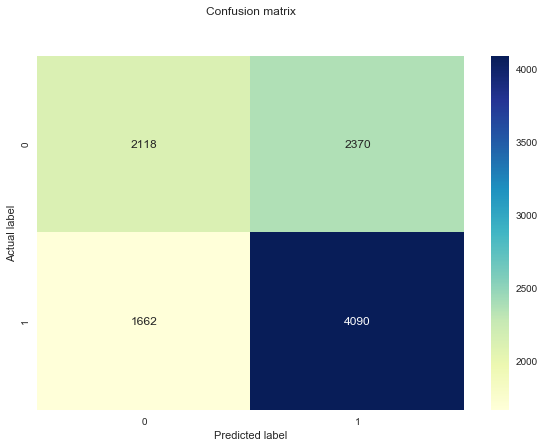

In [44]:
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline)

Total statements classified:10240
Score:0.6467410480534144
Score length:5


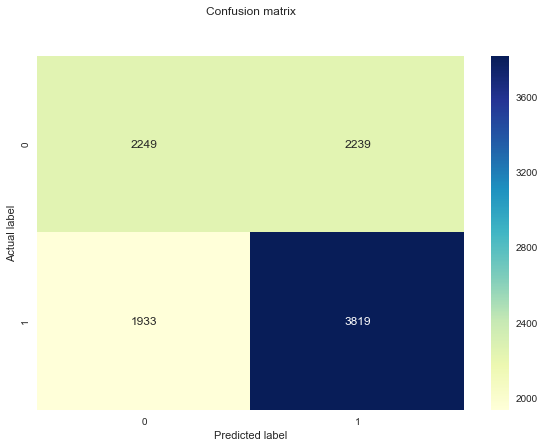

In [45]:
build_confusion_matrix(logR_pipeline)

Total statements classified:10240
Score:0.6105735024319964
Score length:5


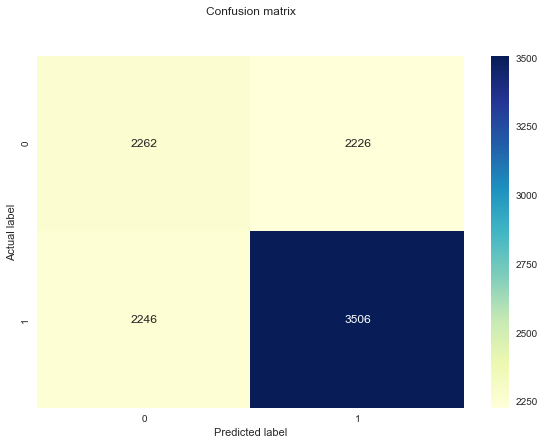

In [46]:
build_confusion_matrix(svm_pipeline)

Total statements classified:10240
Score:0.6171836194470568
Score length:5


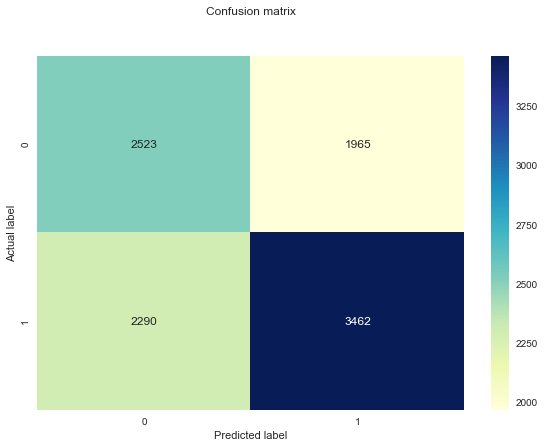

In [47]:
build_confusion_matrix(sgd_pipeline)

Total statements classified:10240
Score:0.6954637426022062
Score length:5


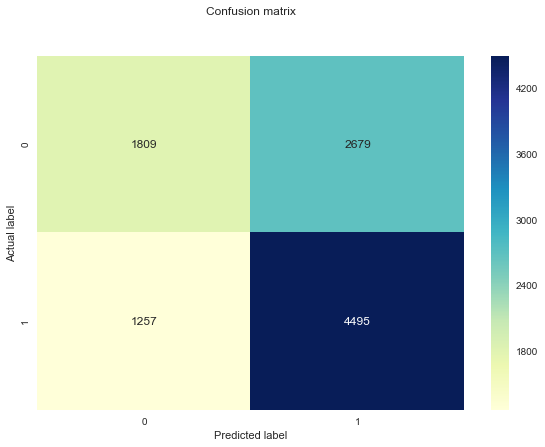

In [48]:
build_confusion_matrix(random_forest)

### NGrams TF-IDF
So far we have used bag of words technique to extract the features and passed those featuers into classifiers. We have also seen the
f1 scores of these classifiers. now lets enhance these features using term frequency weights with various n-grams

#### Building Classifier using Naives Bayes regression

In [49]:
nb_pipeline_ngram = Pipeline([
        ('nb_tfidf',tfidf_ngram),
        ('nb_clf',MultinomialNB())])


nb_pipeline_ngram.fit(train_news[headlinecolname],train_news[labelcolname])
predicted_nb_ngram = nb_pipeline_ngram.predict(test_news[headlinecolname])
np.mean(predicted_nb_ngram == test_news[labelcolname])

0.6029992107340174

#### Building Classifier using Logistic regression

In [50]:
logR_pipeline_ngram = Pipeline([
        ('LogR_tfidf',tfidf_ngram),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

logR_pipeline_ngram.fit(train_news[headlinecolname],train_news[labelcolname])
predicted_LogR_ngram = logR_pipeline_ngram.predict(test_news[headlinecolname])
np.mean(predicted_LogR_ngram == test_news[labelcolname])

0.6187845303867403

#### Building Classifier using Linear SVM Classifier

In [51]:
svm_pipeline_ngram = Pipeline([
        ('svm_tfidf',tfidf_ngram),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(train_news[headlinecolname],train_news[labelcolname])
predicted_svm_ngram = svm_pipeline_ngram.predict(test_news[headlinecolname])
np.mean(predicted_svm_ngram ==test_news[labelcolname])

0.6211523283346487

#### Building Classifier using SVM Stochastic Gradient Descent on hinge loss

In [52]:
sgd_pipeline_ngram = Pipeline([
         ('sgd_tfidf',tfidf_ngram),
         ('sgd_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
         ])

sgd_pipeline_ngram.fit(train_news[headlinecolname],train_news[labelcolname])
predicted_sgd_ngram = sgd_pipeline_ngram.predict(test_news[headlinecolname])
np.mean(predicted_sgd_ngram == test_news[labelcolname])

0.56353591160221

#### Building Classifier using RandomForestClassifier

In [53]:
#random forest classifier
random_forest_ngram = Pipeline([
        ('rf_tfidf',tfidf_ngram),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3))
        ])
    
random_forest_ngram.fit(train_news[headlinecolname],train_news[labelcolname])
predicted_rf_ngram = random_forest_ngram.predict(test_news[headlinecolname])
np.mean(predicted_rf_ngram == test_news[labelcolname])

0.6006314127861089

Total statements classified:10240
Score:0.7224920919443518
Score length:5


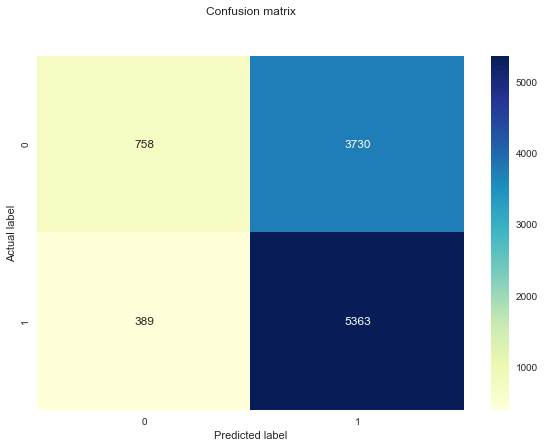

In [54]:
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline_ngram)


Total statements classified:10240
Score:0.7044355553757985
Score length:5


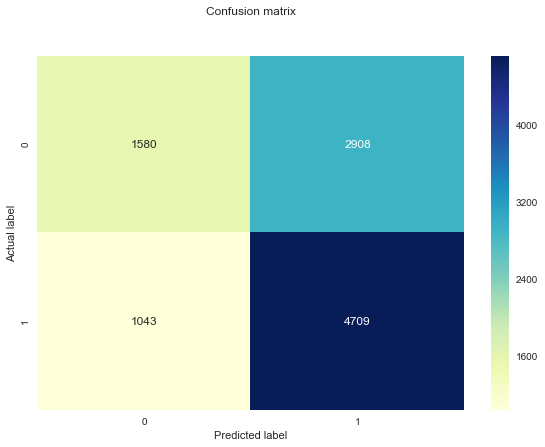

In [55]:
build_confusion_matrix(logR_pipeline_ngram)


Total statements classified:10240
Score:0.6790399132404719
Score length:5


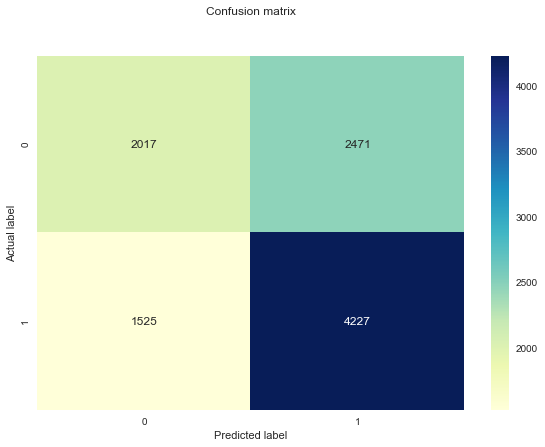

In [56]:
build_confusion_matrix(svm_pipeline_ngram)

Total statements classified:10240
Score:0.7190643331130575
Score length:5


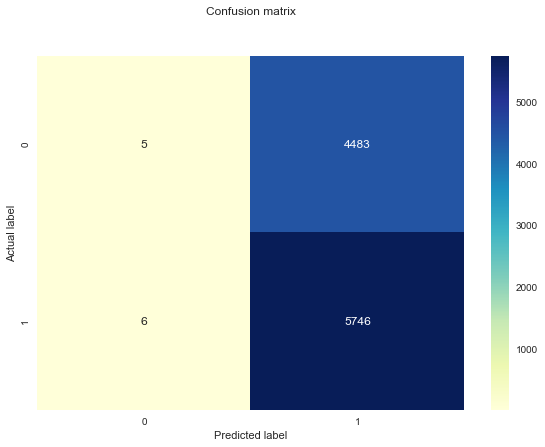

In [57]:
build_confusion_matrix(sgd_pipeline_ngram)

Total statements classified:10240
Score:0.6602575208508185
Score length:5


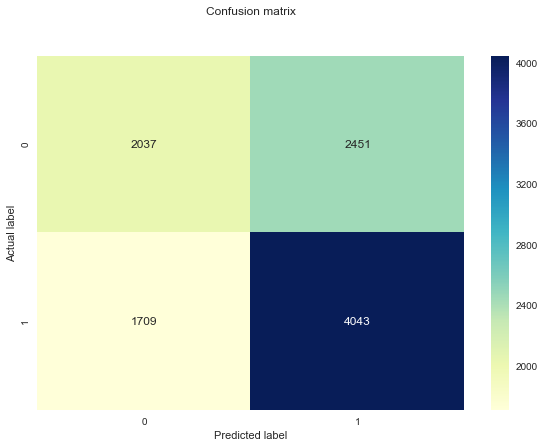

In [58]:
build_confusion_matrix(random_forest_ngram)

In [59]:
# print(classification_report(test_news[labelcolname], predicted_nb_ngram))
print("Logistic Regression")
print(classification_report(test_news[labelcolname], predicted_LogR_ngram))
# print(classification_report(test_news[labelcolname], predicted_svm_ngram))
# print(classification_report(test_news[labelcolname], predicted_sgd_ngram))
print("Random Forest")

print(classification_report(test_news[labelcolname], predicted_rf_ngram))

Logistic Regression
              precision    recall  f1-score   support

           0       0.60      0.37      0.46       553
           1       0.62      0.81      0.71       714

   micro avg       0.62      0.62      0.62      1267
   macro avg       0.61      0.59      0.58      1267
weighted avg       0.62      0.62      0.60      1267

Random Forest
              precision    recall  f1-score   support

           0       0.55      0.45      0.49       553
           1       0.63      0.72      0.67       714

   micro avg       0.60      0.60      0.60      1267
   macro avg       0.59      0.58      0.58      1267
weighted avg       0.59      0.60      0.59      1267



#### Inference for best performing model

Out of all the models fitted, we would take 2 best performing model.
We would call them candidate models from the confusion matrix, we can see that random forest and logistic regression are best performing in terms of precision and recall 
(take a look into false positive and true negative counts which appeares to be low compared to rest of the models)

## Distillation - LDA Topic Models

Using the preprocessandspellcheck method did the data Pre-processing on headlinetext

#### Create a function to convert text to word tokens from cleaned dataset

In [60]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result

#### Documents Class - Helper Class to join and tokenize
Create a class that would geenrate a list of tokenized sentences from dataset, which can then be converted to vector

In [61]:
class ProcessedDocuments(object):
    def __init__(self, *arrays):
        self.arrays = arrays
 
    def __iter__(self):
        for array in self.arrays:
            for document in array:
                for sent in nltk.sent_tokenize(document):
                    yield nltk.word_tokenize(sent)


#### Function that will create a word2vec model

This function will take input of all documents as an numpy array and create a model, we use gensim Word2Vec to create the model

In [62]:
def get_word2vec(sentences, location):
    model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)
    print('Model done training. Saving to disk as ' + 'models/' + location)
    model.save('models/' + location)
    return model

#### Create a function to tokenize docs

In [63]:
def get_tokenized_docs(dataframe,colname):
    documents_locale = dataframe[[colname]]
    tokenized_docs_local = documents_locale[colname].map(get_word_tokens)
    return tokenized_docs_local

#### Create a function to build the dictionary and tokenized docs for given feature

Below function does the following
* #### Dictionary
Returns Dictionary given, dataframe and column name
* #### Tokenizeddocs
Returns Tokenizeddocs, of the all the words in a text in that column can be used for bow_corpus
* #### Dictionary is filtered using Gensim filter_extremes
    Filter out tokens that appear in less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.


In [64]:
def get_dictionary_print_words(dataframe,colname):
    tokenized_docs_local = get_tokenized_docs(dataframe,colname)
    dictionary_gensim = gensim.corpora.Dictionary(tokenized_docs_local)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim,tokenized_docs_local

#### Create a function to build bow_corpus from dictionary and tokenized_docs

In [65]:
def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim,tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local,dictionary_gensim

#### Create a function to build tfidf_corpus from bow_corpus

Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [66]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

#### Create a function to run ldamodel and print top 10 topics

In [67]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

#### Create a function to run ldamodel and print top 10 topics

In [68]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

#### Create a function to enrich data with lda topics, lda topics score, top words

In [69]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

#### Create a function that can enrich topic data to dataframe

In [70]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

### Bag of Words

#### Create a dictionary and tokens
Create dictionary from ‘processed_headline_text’ containing the number of times a word appears in the training set.

In [71]:
bow_corpus_headline,dictionary_headline = get_bow_corpus_print_sample(train_news,processedheadlinecolname)

######## DICTIONARY Words and occurences ########
0 abortions
1 annies
2 demand
3 group
4 list
5 political
6 says
7 supports
8 thirdtrimester
9 administration
10 begin

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]

 ######## PREVIEW BOW ########
Word 0 ("abortions") appears 1 time.
Word 1 ("group") appears 1 time.
Word 2 ("list") appears 1 time.
Word 3 ("political") appears 1 time.
Word 4 ("says") appears 1 time.
Word 5 ("supports") appears 1 time.


#### Running LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [72]:
lda_model_headline,lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline,10,dictionary_headline)

0::['says', 'percent', 'every', 'state', 'health', 'year', 'security', 'plan', 'bill', 'government']
1::['says', 'health', 'care', 'america', 'state', 'country', 'percent', 'insurance', 'year', 'governor']
2::['taxes', 'year', 'states', 'school', 'texas', 'percent', 'people', 'last', 'says', 'united']
3::['would', 'since', 'state', 'says', 'office', 'million', 'percent', 'every', 'took', 'bill']
4::['jobs', 'president', 'says', 'million', 'obama', 'barack', 'created', 'percent', 'said', 'time']
5::['says', 'city', 'obamacare', 'rhode', 'island', 'every', 'said', 'obama', 'austin', 'would']
6::['says', 'percent', 'years', 'budget', 'state', 'scott', 'wisconsin', 'last', 'john', 'would']
7::['obama', 'says', 'president', 'percent', 'barack', 'years', 'people', 'states', 'american', 'state']
8::['says', 'health', 'care', 'percent', 'people', 'voted', 'clinton', 'hillary', 'taxes', 'women']
9::['says', 'percent', 'state', 'states', 'rate', 'united', 'years', 'texas', 'people', 'world']


#### Generate TF-IDF bow_corpus
Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [73]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.44124760810679226),
 (1, 0.4432212674094083),
 (2, 0.4986239258355844),
 (3, 0.4320502154718752),
 (4, 0.11768062592220696),
 (5, 0.39964173785229923)]


#### Running LDA using TF-IDF
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [74]:
lda_tfidf_model_headline = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['state', 'says', 'obama', 'president', 'barack', 'federal', 'scott', 'people', 'taxes', 'budget']
1::['states', 'says', 'percent', 'united', 'obama', 'health', 'care', 'bill', 'barack', 'stimulus']
2::['florida', 'says', 'obama', 'president', 'percent', 'said', 'barack', 'years', 'bush', 'rate']
3::['says', 'percent', 'texas', 'voted', 'state', 'donald', 'jobs', 'system', 'years', 'three']
4::['says', 'right', 'federal', 'made', 'senate', 'states', 'country', 'economy', 'year', 'percent']
5::['says', 'percent', 'campaign', 'state', 'health', 'school', 'republican', 'people', 'care', 'nearly']
6::['percent', 'average', 'years', 'women', 'jobs', 'million', 'says', 'every', 'cost', 'year']
7::['says', 'texas', 'taxes', 'state', 'percent', 'year', 'illegal', 'billion', 'romney', 'money']
8::['says', 'percent', 'americans', 'billion', 'year', 'care', 'health', 'medicare', 'romney', 'mitt']
9::['percent', 'says', 'never', 'country', 'state', 'jobs', 'since', 'obama', 'year', 'every']


#### Headline_text word2Vec Model
Create a Word2Vec model with the list of headline_text

In [75]:
w2vec = get_word2vec(
    ProcessedDocuments(
        train_news[processedheadlinecolname].values, 
        test_news[processedheadlinecolname].values, 
        valid_news[processedheadlinecolname].values
    ),
    'w2vmodel'
)

Model done training. Saving to disk as models/w2vmodel


#### Visualize t-SNE of MeanEmbeddingVector for word2vec

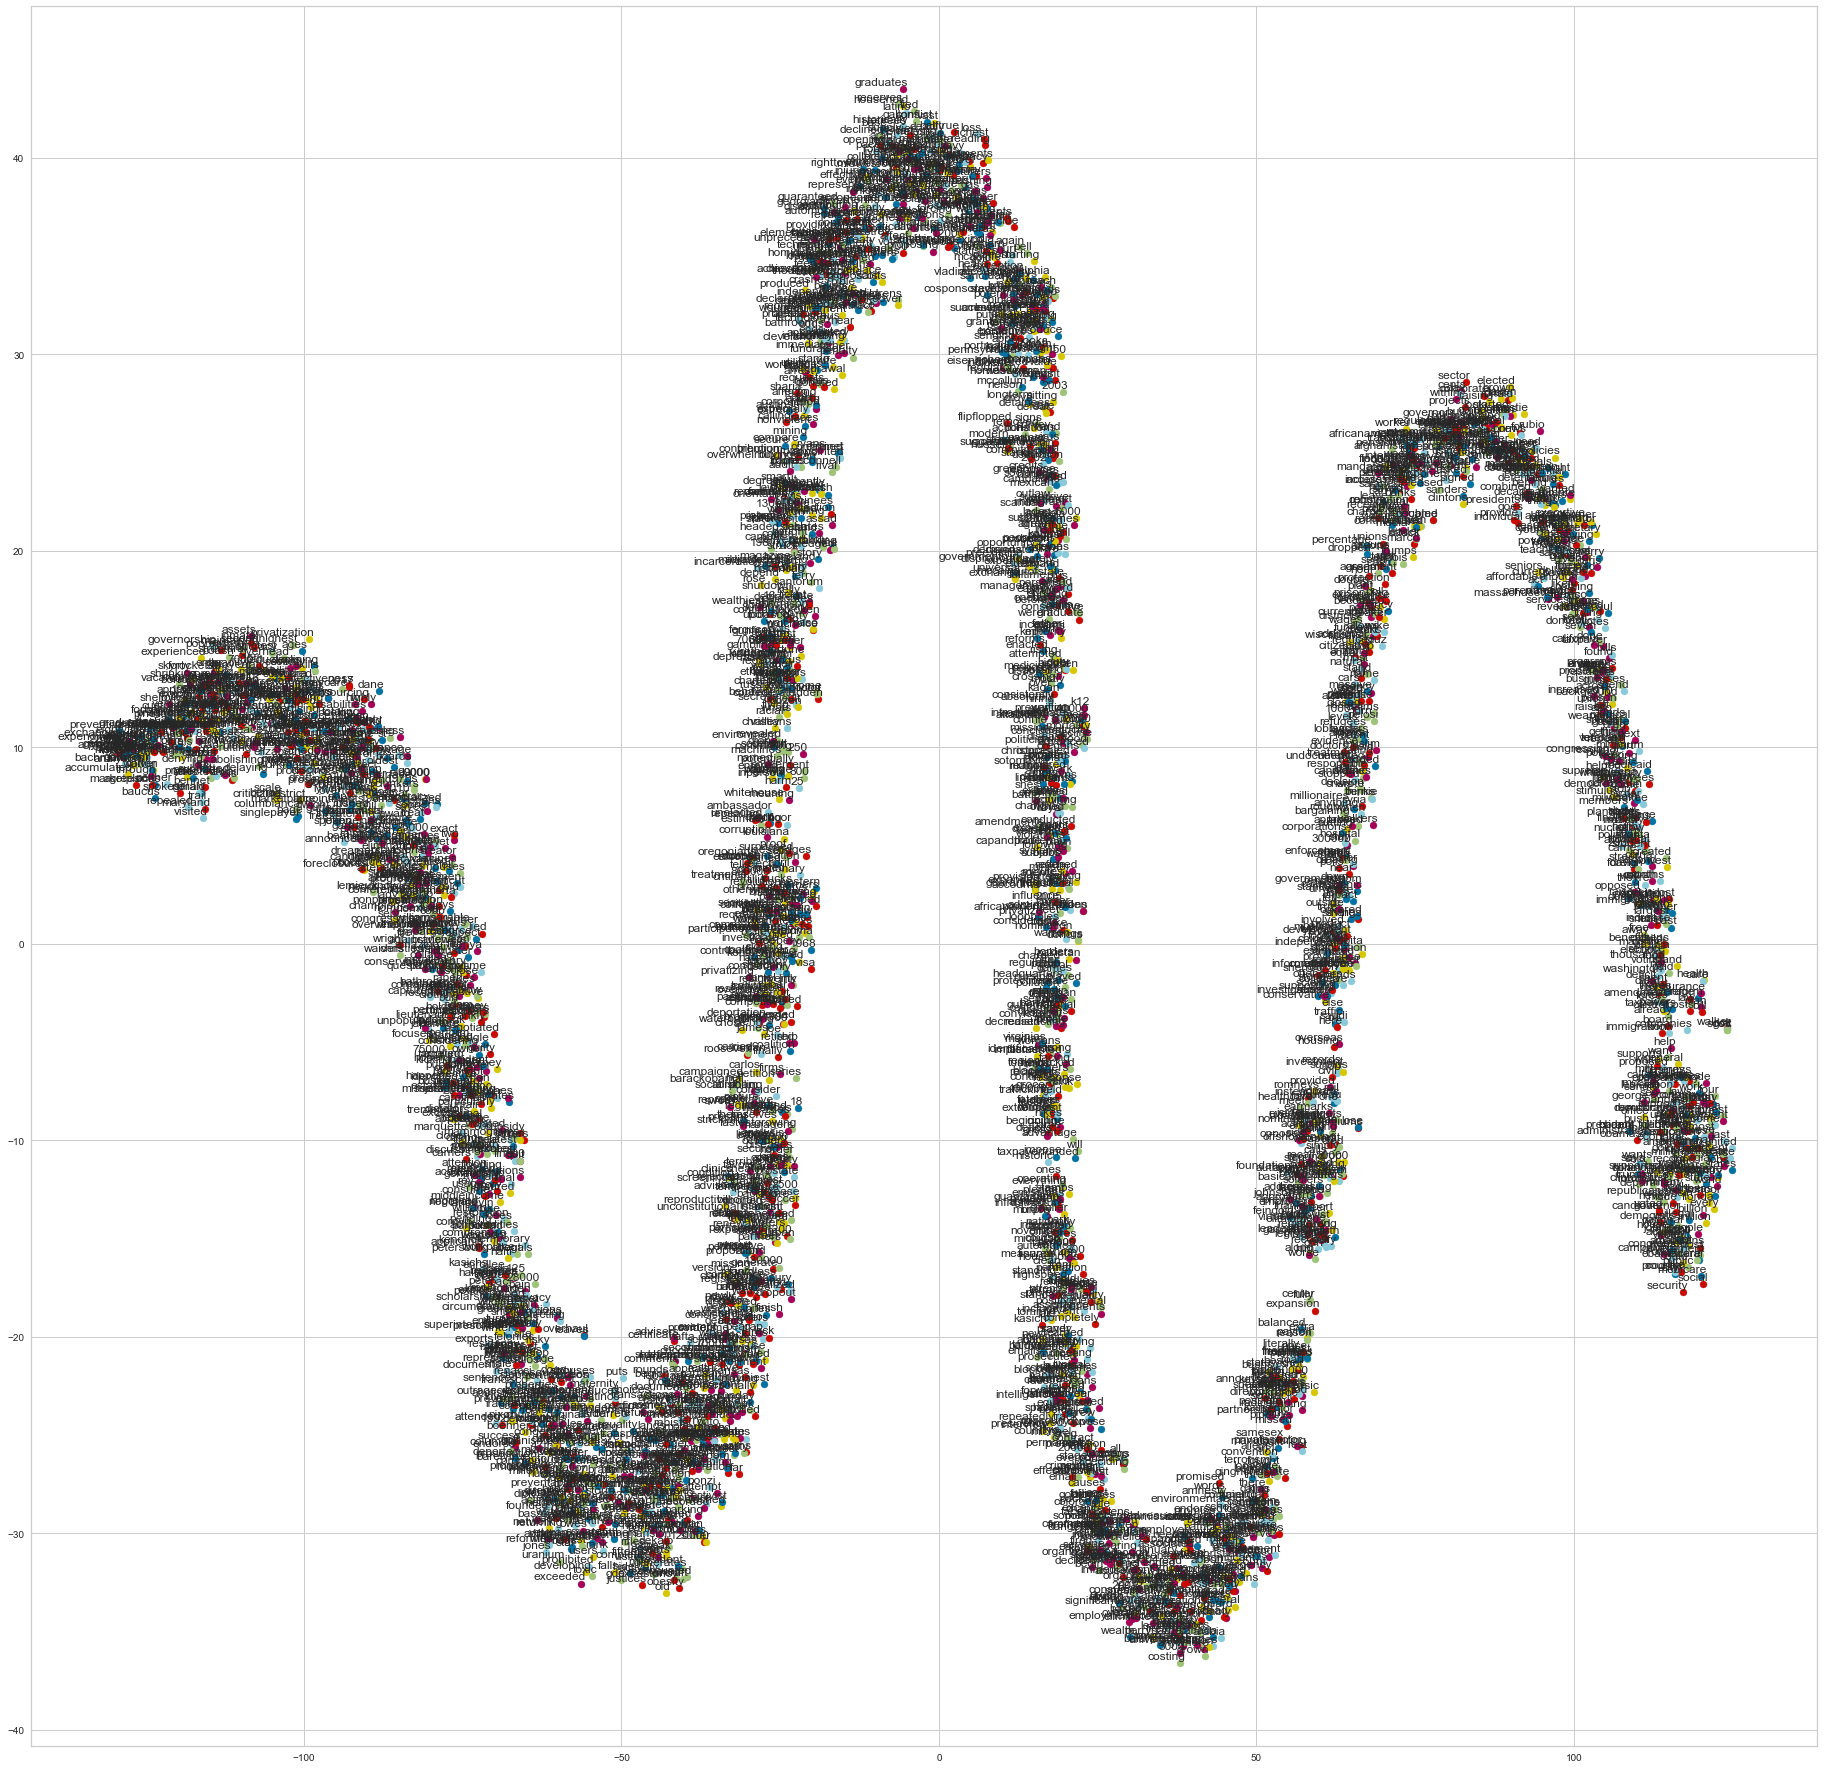

In [76]:
tsne_plot(w2vec,32,32)

#### Semisupervised Labeling
Based on train,test and valid data explored the topic scores for sample data and identified below topics

In [77]:
semisupervised_headline_topic_labels = ['american_clinton_vote','trump_republic_vote',
                                        'obama_immigr_support','health_care_job',
                                        'employe_percent_secur','school_spend_democrat',
                                        'tax_rais_debt','american_peopl_spend',
                                        'creat_job_million','feder_cost_colleg']

#### Assign Topic details to Train, Test and Valid Data Set

In [78]:
headlinetopiccolnames = ['headline_lda_topic_number','headline_lda_topic_score','headline_lda_topic_topwords']
train_news = update_lda_results_to_dataset(
    train_news,headlinetopiccolnames,headlinecolname,
    dictionary_headline,lda_model_headline,lda_headline_topic_words)
train_news.head()

test_news = update_lda_results_to_dataset(
    test_news,headlinetopiccolnames,headlinecolname,
    dictionary_headline,lda_model_headline,lda_headline_topic_words)
test_news.head()

valid_news = update_lda_results_to_dataset(
    valid_news,headlinetopiccolnames,headlinecolname,
    dictionary_headline,lda_model_headline,lda_headline_topic_words)
valid_news.head()  

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,pantsonfirecounts,context,encoded_label,index,processed_headline_text,headline_sentiment_compound,headline_sentiment_polarity_vector,headline_lda_topic_number,headline_lda_topic_score,headline_lda_topic_topwords
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,...,0,an interview with ABC17 News,0,0,less americans working 70s,0.0000,"[0.0, 1.0, 0.0]",8,0.819960,says health care percent people voted clinton ...
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,...,105,NaN,0,1,obama sworn office holy bible instead kuran th...,0.0000,"[0.0, 1.0, 0.0]",3,0.576654,would since state says office million percent ...
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,...,0,a U.S. Ways and Means hearing,0,2,says organizations parading social welfare org...,-0.3400,"[0.138, 0.862, 0.0]",5,0.484687,says city obamacare rhode island every said ob...
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,...,0,an opinion article,1,3,says nearly half oregons children poor,-0.4767,"[0.383, 0.617, 0.0]",1,0.612801,says health care america state country percent...
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,...,9,interview with CBS News,1,4,attacks republicans various programs economic ...,-0.4404,"[0.182, 0.818, 0.0]",8,0.610484,says health care percent people voted clinton ...


### LDA2VEC

lda2vec is an extension of word2vec and LDA that jointly learns word, document, and topic vectors. It is  specifically builds on top of the skip-gram model of word2vec to generate word vectors. With lda2vec, instead of using the word vector directly to predict context words, we leverage a context vector to make the predictions. This context vector is created as the sum of two other vectors: the word vector and the document vector

#### LDA to Vector Model lda2vec
Create a LDA2Vec model with the list of topic top words

In [79]:
lda2vec = get_word2vec(
    ProcessedDocuments(
        train_news['headline_lda_topic_topwords'].values, 
        test_news['headline_lda_topic_topwords'].values, 
        valid_news['headline_lda_topic_topwords'].values
    ),
    'lda2vecmodel'
)
   

Model done training. Saving to disk as models/lda2vecmodel


#### Visualize t-SNE of MeanEmbeddingVector for lda2vec

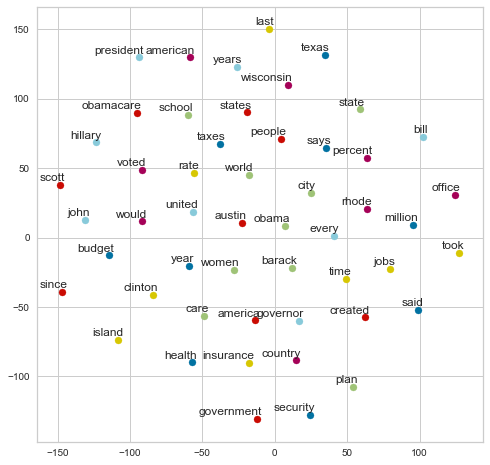

In [80]:
tsne_plot(lda2vec,8,8)

## Complex Feature - Context

Taking context as a feature which is complex, however there are lot of unique contexts in dataset.

### Steps to accomplish
* #### Identify unique context values which is huge
* #### Reduce it to 10 meaningful contexts using LDA
* #### Semisupervised context topics
* #### We will enrich dataset with new topic labels
* #### Tag the documents using gensim tagging
* #### Apply doc2vec on the tagged documents
* #### Distill it with LDA topics on headline
* #### Distill it with Sentiment Analysis on headline
* #### New vector formed will be part of my polynomial equation


In [81]:
contextcolname = 'context'
processedcontextcolname = 'processed_context'

#### Define function to preprocess context

In [82]:
def preprocess_context(text):
    text = lemmatize_stemming(text)
    #print('Lemmatized :: ' + text)
    text = remove_punctuation(text)
    #print('Punctuation removed :: ' + text)
    return text

In [83]:
preprocess_context(str('a floor speech.'))

'a floor speech'

#### Apply Preprocessing for all datasets on Context

In [84]:
def apply_context_preprocess_dataframe(dflocal):
    dflocal[contextcolname] = dflocal[contextcolname].fillna('others')
    dflocal[processedcontextcolname] = dflocal.apply(
        lambda row: preprocess_context(str(row[contextcolname])), axis=1)
    return dflocal

train_news = apply_context_preprocess_dataframe(train_news)
test_news = apply_context_preprocess_dataframe(test_news)
valid_news = apply_context_preprocess_dataframe(valid_news)

dfcontextunique = train_news
dfcontextunique = dfcontextunique.append([test_news, valid_news])

In [85]:
len(dfcontextunique.context.unique())

5143

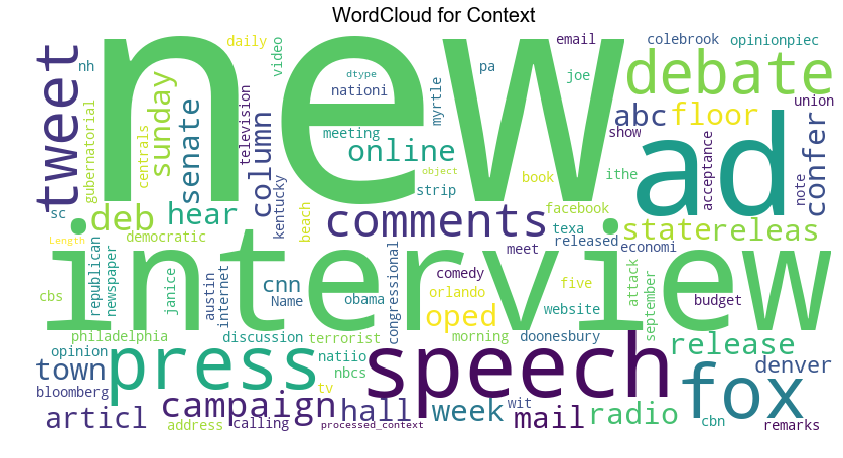

In [86]:
create_word_cloud(dfcontextunique,processedcontextcolname,'WordCloud for Context')

#### Dictionary of context and Bag of words Vector

In [87]:
bow_corpus_context,dictionary_context = get_bow_corpus_print_sample(dfcontextunique,contextcolname)

######## DICTIONARY Words and occurences ########
0 mailer
1 floor
2 speech
3 denver
4 news
5 release
6 interview
7 online
8 opinion
9 piece
10 press

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1)]

 ######## PREVIEW BOW ########
Word 0 ("mailer") appears 1 time.


#### Run LDA against bow context to get top topics for context

In [88]:
lda_model_context,lda_context_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_context,10,dictionary_context)

0::['interview', 'campaign', 'news', 'show', 'with', 'mailer', 'newspaper', 'appearance', 'commentary', 'sunday']
1::['press', 'release', 'meet', 'post', 'blog', 'facebook', 'iowa', 'media', 'column', 'meme']
2::['speech', 'mail', 'chain', 'newsletter', 'email', 'editorial', 'political', 'board', 'book', 'tampa']
3::['interview', 'debate', 'radio', 'presidential', 'with', 'msnbc', 'republican', 'morning', 'business', 'vegas']
4::['speech', 'convention', 'democratic', 'debate', 'national', 'meeting', 'town', 'hall', 'republican', 'texas']
5::['state', 'speech', 'house', 'floor', 'senate', 'union', 'address', 'hearing', 'committee', 'remarks']
6::['news', 'release', 'statement', 'interview', 'nation', 'article', 'face', 'website', 'campaign', 'jersey']
7::['campaign', 'conference', 'week', 'tweet', 'this', 'press', 'news', 'commercial', 'rally', 'twitter']
8::['television', 'video', 'interview', 'campaign', 'with', 'youtube', 'opinion', 'piece', 'week', 'this']
9::['comments', 'email', '

In [89]:
semisupervised_context_topics = ['interview_campaign_appearance','pressrelease_media',
                                 'book_newsletter','presidential_debate',
                                 'townhall_meeting','senate_house_floor',
                                 'news_release_nation','twitter_online_campaign'
                                'interview_media','public_comments']

#### Assign context topics back to dataset

In [90]:
contexttopiccolnames = ['context_lda_topic_number','context_lda_topic_score','context_lda_topic_topwords']
contexttopicnamecol = 'context_lda_topic_name'
train_news = update_lda_results_to_dataset(
    train_news,contexttopiccolnames,contextcolname,
    dictionary_context,lda_model_context,lda_context_topic_words)
train_news[contexttopicnamecol] = train_news[processedcontextcolname] = train_news.apply(
        lambda row: semisupervised_context_topics[int(row['context_lda_topic_number'])-1], axis=1)
train_news.head()

test_news = update_lda_results_to_dataset(
    test_news,contexttopiccolnames,contextcolname,
    dictionary_headline,lda_model_headline,lda_headline_topic_words)
test_news[contexttopicnamecol] = test_news[processedcontextcolname] = test_news.apply(
        lambda row: semisupervised_context_topics[int(row['context_lda_topic_number'])-1], axis=1)                                                 
test_news.head()

valid_news = update_lda_results_to_dataset(
    valid_news,contexttopiccolnames,contextcolname,
    dictionary_headline,lda_model_headline,lda_headline_topic_words)
valid_news[contexttopicnamecol] = valid_news[processedcontextcolname] = valid_news.apply(
        lambda row: semisupervised_context_topics[int(row['context_lda_topic_number'])-1], axis=1)
valid_news.head() 

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,headline_sentiment_compound,headline_sentiment_polarity_vector,headline_lda_topic_number,headline_lda_topic_score,headline_lda_topic_topwords,processed_context,context_lda_topic_number,context_lda_topic_score,context_lda_topic_topwords,context_lda_topic_name
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,...,0.0000,"[0.0, 1.0, 0.0]",8,0.819960,says health care percent people voted clinton ...,presidential_debate,4,0.549971,jobs president says million obama barack creat...,presidential_debate
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,...,0.0000,"[0.0, 1.0, 0.0]",3,0.576654,would since state says office million percent ...,public_comments,0,0.100000,says percent every state health year security ...,public_comments
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,...,-0.3400,"[0.138, 0.862, 0.0]",5,0.484687,says city obamacare rhode island every said ob...,book_newsletter,3,0.549950,would since state says office million percent ...,book_newsletter
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,...,-0.4767,"[0.383, 0.617, 0.0]",1,0.612801,says health care america state country percent...,public_comments,0,0.100000,says percent every state health year security ...,public_comments
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,...,-0.4404,"[0.182, 0.818, 0.0]",8,0.610484,says health care percent people voted clinton ...,presidential_debate,4,0.549974,jobs president says million obama barack creat...,presidential_debate


#### Write enrich Data with context topics to csv for future use

In [91]:
train_news.to_csv("enriched_data/train_contextlda.csv", sep=',')
test_news.to_csv("enriched_data/test_contextlda.csv", sep=',')
valid_news.to_csv("enriched_data/valid_contextlda.csv", sep=',')

#### Train News Distribution against context

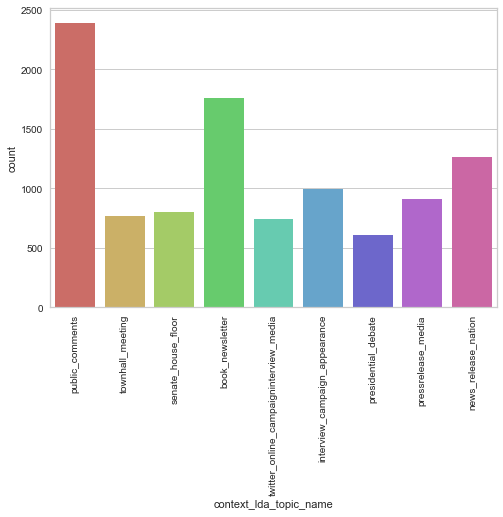

In [92]:
create_distribution(train_news, contexttopicnamecol)

#### Test News Distribution against topics

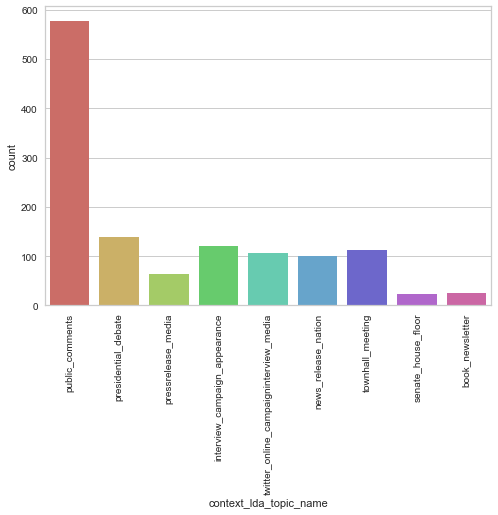

In [93]:
create_distribution(test_news,contexttopicnamecol)

#### Valid News Distribution against topics

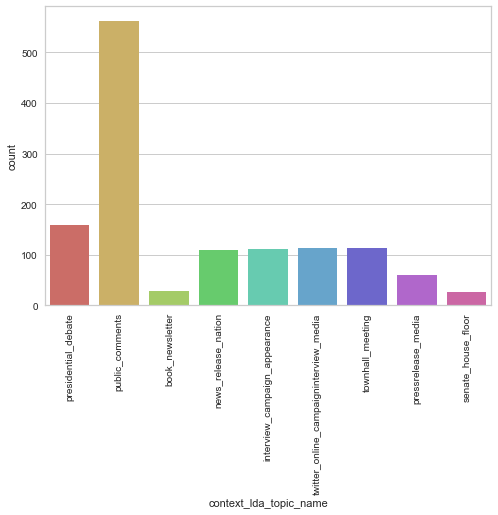

In [94]:
create_distribution(valid_news,contexttopicnamecol)

In [95]:
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#### Create function to tag Documents

In [96]:
#tag each headline text with the label found in previous step
def tag_headline(data, coltotag, colusedtotag):
    tagged_data = []
    for index, row in data.iterrows():
        tagged_data.append(TaggedDocument(words=get_word_tokens(row[coltotag]), tags=[row[colusedtotag]]))
    return tagged_data

### Tagging

Tag Documents against context Train, Test and Valid

In [97]:
#tag train data and run doc2vec model
context_labelled_headlines_train = tag_headline(train_news, processedheadlinecolname, contexttopicnamecol)
print(context_labelled_headlines_train[:3])

#tag train data and run doc2vec model
context_labelled_headlines_test = tag_headline(test_news, processedheadlinecolname, contexttopicnamecol)
print(context_labelled_headlines_test[:3])

#tag train data and run doc2vec model
context_labelled_headlines_valid = tag_headline(valid_news, processedheadlinecolname, contexttopicnamecol)
print(context_labelled_headlines_valid[:3])

[TaggedDocument(words=['says', 'annies', 'list', 'political', 'group', 'supports', 'thirdtrimester', 'abortions', 'demand'], tags=['public_comments']), TaggedDocument(words=['decline', 'coal', 'start', 'started', 'natural', 'took', 'started', 'begin', 'president', 'george', 'bushs', 'administration'], tags=['townhall_meeting']), TaggedDocument(words=['hillary', 'clinton', 'agrees', 'john', 'mccain', 'voting', 'give', 'george', 'bush', 'benefit', 'doubt', 'iran'], tags=['public_comments'])]
[TaggedDocument(words=['building', 'wall', 'usmexico', 'border', 'take', 'literally', 'years'], tags=['public_comments']), TaggedDocument(words=['wisconsin', 'pace', 'double', 'number', 'layoffs', 'year'], tags=['presidential_debate']), TaggedDocument(words=['says', 'john', 'mccain', 'done', 'nothing', 'help', 'vets'], tags=['pressrelease_media'])]
[TaggedDocument(words=['less', 'americans', 'working'], tags=['presidential_debate']), TaggedDocument(words=['obama', 'sworn', 'office', 'holy', 'bible', 

#### Apply Doc2Vec on Tagged Documents to created doc2vec models
We use doc2vec as we are doing it on a sentence, would have been better to do word2vec if it were a word

In [98]:
doc2vec_model_train = Doc2Vec(documents = context_labelled_headlines_train,
                              dm=0, num_features=500, min_count=2, size=21, window=4)
doc2vec_model_test= Doc2Vec(documents = context_labelled_headlines_test,
                              dm=0, num_features=500, min_count=2, size=21, window=4)
doc2vec_model_valid= Doc2Vec(documents = context_labelled_headlines_valid,
                              dm=0, num_features=500, min_count=2, size=21, window=4)

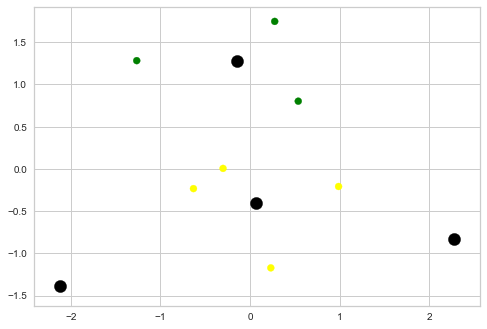

In [99]:
kmeans_cluster_visualization(doc2vec_model_train,4)

In [100]:
#Method to convert doc2vec model and tagged documents into vectors training and testing
def create_vector_for_learning(model, tagged_docs):
    #documents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in tagged_docs])
    return targets, regressors

#### Doc2Vec Model to Vector converter
Create function to apply as lambda to convert text, doc2vecmodel to vector

In [101]:
def create_docvector(doc2vec_model,label):
    return doc2vec_model.docvecs[label]

#### Add vector for every text in the dataset

In [102]:
def apply_context_doc2vec(dflocal,doc2vec_model, vectorcolname, label):
    dflocal[vectorcolname] = dflocal.apply(
        lambda row: create_docvector(doc2vec_model,str(row[label])), axis=1)
    return dflocal

#### Update Dataset with vectors identified by Doc2Vec applied on context

In [103]:
contextdoc2veccolumn = 'content_doc2vec_vector'
train_news = apply_context_doc2vec(train_news, doc2vec_model_train,contextdoc2veccolumn,contexttopicnamecol)
train_news.head()

test_news = apply_context_doc2vec(test_news, doc2vec_model_test,contextdoc2veccolumn,contexttopicnamecol)
test_news.head()

valid_news = apply_context_doc2vec(valid_news, doc2vec_model_valid,contextdoc2veccolumn,contexttopicnamecol)
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,headline_sentiment_polarity_vector,headline_lda_topic_number,headline_lda_topic_score,headline_lda_topic_topwords,processed_context,context_lda_topic_number,context_lda_topic_score,context_lda_topic_topwords,context_lda_topic_name,content_doc2vec_vector
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,...,"[0.0, 1.0, 0.0]",8,0.819960,says health care percent people voted clinton ...,presidential_debate,4,0.549971,jobs president says million obama barack creat...,presidential_debate,"[-0.23797712, 0.55482185, -0.74135077, -0.0164..."
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,...,"[0.0, 1.0, 0.0]",3,0.576654,would since state says office million percent ...,public_comments,0,0.100000,says percent every state health year security ...,public_comments,"[-0.169468, 0.6540211, -0.8739169, -0.047774, ..."
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,...,"[0.138, 0.862, 0.0]",5,0.484687,says city obamacare rhode island every said ob...,book_newsletter,3,0.549950,would since state says office million percent ...,book_newsletter,"[-0.14645325, 0.4851716, -0.5840696, -0.013874..."
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,...,"[0.383, 0.617, 0.0]",1,0.612801,says health care america state country percent...,public_comments,0,0.100000,says percent every state health year security ...,public_comments,"[-0.169468, 0.6540211, -0.8739169, -0.047774, ..."
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,...,"[0.182, 0.818, 0.0]",8,0.610484,says health care percent people voted clinton ...,presidential_debate,4,0.549974,jobs president says million obama barack creat...,presidential_debate,"[-0.23797712, 0.55482185, -0.74135077, -0.0164..."


In [104]:
create_docvector(doc2vec_model_train,train_news[contexttopicnamecol][0])

array([ 0.15415175,  1.1714528 , -0.92645097,  0.14692944, -1.2748761 ,
       -1.0029851 , -0.17938344,  1.100297  , -1.0022368 ,  0.46520415,
       -1.2214063 ,  1.4889724 , -0.6306713 ,  1.1156805 , -1.303894  ,
       -0.33428285,  1.1854404 ,  1.0606472 ,  0.94075304,  1.2289617 ,
        1.400582  ], dtype=float32)

In [105]:
[train_news['headline_lda_topic_score'][0],
           train_news['headline_sentiment_compound'][0],
            create_docvector(doc2vec_model_train,train_news[contexttopicnamecol][0])]

[0.8874626755714417,
 0.25,
 array([ 0.15415175,  1.1714528 , -0.92645097,  0.14692944, -1.2748761 ,
        -1.0029851 , -0.17938344,  1.100297  , -1.0022368 ,  0.46520415,
        -1.2214063 ,  1.4889724 , -0.6306713 ,  1.1156805 , -1.303894  ,
        -0.33428285,  1.1854404 ,  1.0606472 ,  0.94075304,  1.2289617 ,
         1.400582  ], dtype=float32)]

In [106]:
print (type(train_news[contextdoc2veccolumn][0]))
np.append(train_news[contextdoc2veccolumn][0],
          (train_news['headline_lda_topic_score'][0],train_news['headline_sentiment_compound'][0]))

##pd.concat([train_news['headline_lda_topic_score'],
           ##train_news['headline_sentiment_compound'],train_news[contextvectorcolumn][0]],axis=1)

<class 'numpy.ndarray'>


array([ 0.15415175,  1.17145276, -0.92645097,  0.14692944, -1.27487612,
       -1.00298512, -0.17938344,  1.10029697, -1.00223684,  0.46520415,
       -1.22140634,  1.48897243, -0.63067132,  1.11568046, -1.30389404,
       -0.33428285,  1.18544042,  1.06064725,  0.94075304,  1.22896171,
        1.40058196,  0.88746268,  0.25      ])

In [107]:
#### Append LDA, Sentiment, Feature Vector
def apply_feature_distill_vector(dflocal, vectorcolname, doc2veccolname):
    dflocal[vectorcolname] = dflocal.apply(
        lambda row: np.append(row[doc2veccolname],
          (row['headline_lda_topic_score'],row['headline_sentiment_compound'])), axis=1)
    return dflocal

## Create Feature Vector for Context

* #### Append Context Feature Doc2Vec column
* #### Append LDA topic retrieved through distillation
* #### Append Sentiment Analysis Compount retrieved through distillation

In [108]:
contextfeaturevector = 'contextfeaturevector'

train_news = apply_feature_distill_vector(train_news, contextfeaturevector, contextdoc2veccolumn)
test_news = apply_feature_distill_vector(test_news,contextfeaturevector, contextdoc2veccolumn)
valid_news = apply_feature_distill_vector(valid_news,contextfeaturevector, contextdoc2veccolumn)

train_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,headline_lda_topic_number,headline_lda_topic_score,headline_lda_topic_topwords,processed_context,context_lda_topic_number,context_lda_topic_score,context_lda_topic_topwords,context_lda_topic_name,content_doc2vec_vector,contextfeaturevector
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,5,0.887463,says city obamacare rhode island every said ob...,public_comments,0,0.549999,interview campaign news show with mailer newsp...,public_comments,"[0.15415175, 1.1714528, -0.92645097, 0.1469294...","[0.15415175259113312, 1.1714527606964111, -0.9..."
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,4,0.582675,jobs president says million obama barack creat...,townhall_meeting,5,0.699973,state speech house floor senate union address ...,townhall_meeting,"[-0.4678196, 0.47457826, -0.15476048, 0.157963...","[-0.46781960129737854, 0.47457826137542725, -0..."
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,6,0.498575,says percent years budget state scott wisconsi...,public_comments,9,0.549991,comments email letter others website post colu...,public_comments,"[0.15415175, 1.1714528, -0.92645097, 0.1469294...","[0.15415175259113312, 1.1714527606964111, -0.9..."
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,8,0.899961,says health care percent people voted clinton ...,senate_house_floor,6,0.699990,news release statement interview nation articl...,senate_house_floor,"[-0.835546, 1.0274556, -0.97838986, 0.23143409...","[-0.8355460166931152, 1.0274555683135986, -0.9..."
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,6,0.526313,says percent years budget state scott wisconsi...,book_newsletter,3,0.549983,interview debate radio presidential with msnbc...,book_newsletter,"[0.7441651, 1.6632639, 0.31385094, -0.31133035...","[0.7441651225090027, 1.6632639169692993, 0.313..."


In [109]:
def getcontextfeaturetrainvector():
    sentiment = train_news.headline_sentiment_compound.reset_index()['headline_sentiment_compound']
    topic = train_news.headline_lda_topic_score.reset_index()['headline_lda_topic_score']
    context_doc2vec = []
    for i in range(len(train_news[contexttopicnamecol])):
        context_value = train_news[contexttopicnamecol][i]
        context = doc2vec_model_train[context_value]
        context_doc2vec.append(context)
    
    context_vector = pd.concat([sentiment,topic, pd.DataFrame(context_doc2vec)],axis=1)
    return context_vector

In [110]:
def getcontextfeaturetestvector():
    sentiment = test_news.headline_sentiment_compound.reset_index()['headline_sentiment_compound']
    topic = test_news.headline_lda_topic_score.reset_index()['headline_lda_topic_score']
    context_doc2vec = []
    for i in range(len(test_news[contexttopicnamecol])):
        context_value = test_news[contexttopicnamecol][i]
        context = doc2vec_model_test[context_value]
        context_doc2vec.append(context)
    
    context_vector = pd.concat([sentiment,topic, pd.DataFrame(context_doc2vec)],axis=1)
    return context_vector

In [111]:
context_vector = getcontextfeaturetrainvector()

In [112]:
context_vector_test = getcontextfeaturetestvector()

In [113]:
#Get train and test data for classification
X_train = getcontextfeaturetrainvector()
y_train = train_news['encoded_label']

X_test = getcontextfeaturetestvector()
y_test = test_news['encoded_label']

In [114]:
#perform vector classification using SVM
from sklearn.svm import SVC
fake_news_svm_classifier = SVC(kernel = 'linear', random_state = 42)
model = fake_news_svm_classifier.fit(X_train,y_train)
y_pred = model.predict(X_test)
estimate_score(y_test, y_pred)

accuracy: 56.353591160220994
precision: [0.         0.56353591]
recall: [0. 1.]
fscore: [0.         0.72084806]
support: [553 714]


In [115]:
#perform vector classification using Logistic Regression
from sklearn.linear_model import  LogisticRegression
fake_news_classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
fake_news_classifier.fit(X_train, y_train)
y_pred = fake_news_classifier.predict(X_test)
estimate_score(y_test, y_pred)

accuracy: 56.353591160220994
precision: [0.         0.56353591]
recall: [0. 1.]
fscore: [0.         0.72084806]
support: [553 714]


In [116]:
feature = []
for index,row in X_test.iterrows():
    feature.append(row.tolist())
    
final_data = []
for i in range(len(test_news)):
    data = {}
    headline = test_news['headline_text'][i]
    encoded_label = test_news['encoded_label'][i]
    context_vector = feature[i]
    
    data = {'headline_text':headline, 'encoded_label':encoded_label, 'context_vector':context_vector}
    final_data.append(data)

test_feature = pd.DataFrame(final_data)
test_feature.to_csv("enriched_data/test_contextfeature.csv", sep=',')

In [117]:
feature = []
for index,row in X_train.iterrows():
    feature.append(row.tolist())
    
final_data = []
for i in range(len(train_news)):
    data = {}
    headline = train_news['headline_text'][i]
    encoded_label = train_news['encoded_label'][i]
    context_vector = feature[i]
    
    data = {'headline_text':headline, 'encoded_label':encoded_label, 'context_vector':context_vector}
    final_data.append(data)

train_feature = pd.DataFrame(final_data)
train_feature.to_csv("enriched_data/train_contextfeature.csv", sep=',')

In [118]:
train_news.to_csv("enriched_data/train_contextfeature.csv", sep=',')
test_news.to_csv("enriched_data/test_contextfeature.csv", sep=',')
valid_news.to_csv("enriched_data/valid_contextfeature.csv", sep=',')

In [119]:
# from sklearn.linear_model import  LogisticRegression

In [120]:
# X_train = pd.DataFrame(train_news[contextfeaturevector])
# y_train = train_news['encoded_label']

# X_test = test_news[contextfeaturevector]
# y_test = test_news['encoded_label']

# #perform vector classification using Logistic Regression
# fake_news_classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
# fake_news_classifier.fit(X_train, y_train)
# y_pred = fake_news_classifier.predict(X_test)

# df2 = pd.DataFrame(values, index=index, columns=columns)

In [121]:
# X_train = getcontextfeaturetrainvector()
# y_train = train_news['encoded_label']

# X_test = getcontextfeaturetrainvector()
# y_test = test_news['encoded_label']

# #perform vector classification using Logistic Regression
# fake_news_classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
# fake_news_classifier.fit(X_train, y_train)
# y_pred = fake_news_classifier.predict(X_test)

## Complex Feature - Clickbait

Taking clickbait as feature, we will work the following steps to reach the vector

### Steps to accomplish
* Identify ways to increase clickbait 
    - Length of Headline
    - Question mark
    - Exclamation
    - Caps Ratio
* We will enrich dataset with new topic labels as defined above 
* If any of the above is present then we will mark it as clickbait
* Tag the documents using gensim tagging
* Apply doc2vec on the tagged documents
* Distill it with LDA topics on headline
* Distill it with Sentiment Analysis on headline
* New vector formed will be part of my polynomial equation

#### Create a function to identify presence of exclamation

In [122]:
def get_exclamation(text):
    if '!' in text:
        return 1
    else:
        return 0

#### Create a function to identify presence of question mark

In [123]:
def get_question(text):
    if '?' in text:
        return 1
    else:
        return 0

#### Create a function to length of CAPS_RATIO

In [124]:
def get_caps_ratio(text):
    temp_np_title = text.strip(string.punctuation).split()
    np_title = [word.strip(string.punctuation) for word in temp_np_title]
    final_title = [word for word in np_title if word not in set(stopwords.words('english'))]
    final_title = " ".join(final_title)
    num_caps = len([elem for elem in final_title if elem.isupper()])
    num_words = len([elem for elem in final_title if elem == ' ']) + 1
    ratio = num_caps / num_words
    return ratio

#### Enrich dataset with presence of exclamation,caps_ratio,questionmark and length

In [125]:
clickbait_features = ['question','exclamation','caps_ratio','length_of_text']
def update_data_set_for_clickbait_features(dataframe):
    dataframe[clickbait_features] = dataframe.apply(lambda row: pd.Series([get_question(row[headlinecolname]), get_exclamation(row[headlinecolname]),get_caps_ratio(row[headlinecolname]),str(len(row[headlinecolname]))]),axis=1)
    return dataframe

In [126]:
train_news = update_data_set_for_clickbait_features(train_news)
train_news.head()

test_news = update_data_set_for_clickbait_features(test_news)
test_news.head()

valid_news = update_data_set_for_clickbait_features(valid_news)
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,context_lda_topic_number,context_lda_topic_score,context_lda_topic_topwords,context_lda_topic_name,content_doc2vec_vector,contextfeaturevector,question,exclamation,caps_ratio,length_of_text
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,...,4,0.549971,jobs president says million obama barack creat...,presidential_debate,"[-0.23797712, 0.55482185, -0.74135077, -0.0164...","[-0.23797711730003357, 0.5548218488693237, -0....",0,0,0.400000,51
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,...,0,0.100000,says percent every state health year security ...,public_comments,"[-0.169468, 0.6540211, -0.8739169, -0.047774, ...","[-0.1694680005311966, 0.6540210843086243, -0.8...",0,0,0.812500,148
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,...,3,0.549950,would since state says office million percent ...,book_newsletter,"[-0.14645325, 0.4851716, -0.5840696, -0.013874...","[-0.14645324647426605, 0.4851715862751007, -0....",0,0,0.111111,204
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,...,0,0.100000,says percent every state health year security ...,public_comments,"[-0.169468, 0.6540211, -0.8739169, -0.047774, ...","[-0.1694680005311966, 0.6540210843086243, -0.8...",0,0,0.333333,46
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,...,4,0.549974,jobs president says million obama barack creat...,presidential_debate,"[-0.23797712, 0.55482185, -0.74135077, -0.0164...","[-0.23797711730003357, 0.5548218488693237, -0....",0,0,0.166667,190


#### Enrich dataset with label clickbait yes or no

In [127]:
def clickbait(question,exclamation,caps_ratio, text_length):
    if any([question==1, exclamation==1 , caps_ratio > 1]):
        return 'yes'
    return 'no'

In [128]:
clickbait(1,1,3,500)

'yes'

In [129]:
clickbaitfeature = 'clickbait_feature'
def update_data_set_for_clickbait_label(dataframe):
    dataframe['clickbait_feature'] = dataframe.apply(lambda row: clickbait(row['question'],
                                                                            row['exclamation'],
                                                                            row['caps_ratio'],
                                                                           int(row['length_of_text'])), axis=1)
    return dataframe

In [130]:
train_news = update_data_set_for_clickbait_label(train_news)
train_news.head()

test_news = update_data_set_for_clickbait_label(test_news)
test_news.head()

valid_news = update_data_set_for_clickbait_label(valid_news)
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,context_lda_topic_score,context_lda_topic_topwords,context_lda_topic_name,content_doc2vec_vector,contextfeaturevector,question,exclamation,caps_ratio,length_of_text,clickbait_feature
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,...,0.549971,jobs president says million obama barack creat...,presidential_debate,"[-0.23797712, 0.55482185, -0.74135077, -0.0164...","[-0.23797711730003357, 0.5548218488693237, -0....",0,0,0.400000,51,no
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,...,0.100000,says percent every state health year security ...,public_comments,"[-0.169468, 0.6540211, -0.8739169, -0.047774, ...","[-0.1694680005311966, 0.6540210843086243, -0.8...",0,0,0.812500,148,no
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,...,0.549950,would since state says office million percent ...,book_newsletter,"[-0.14645325, 0.4851716, -0.5840696, -0.013874...","[-0.14645324647426605, 0.4851715862751007, -0....",0,0,0.111111,204,no
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,...,0.100000,says percent every state health year security ...,public_comments,"[-0.169468, 0.6540211, -0.8739169, -0.047774, ...","[-0.1694680005311966, 0.6540210843086243, -0.8...",0,0,0.333333,46,no
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,...,0.549974,jobs president says million obama barack creat...,presidential_debate,"[-0.23797712, 0.55482185, -0.74135077, -0.0164...","[-0.23797711730003357, 0.5548218488693237, -0....",0,0,0.166667,190,no


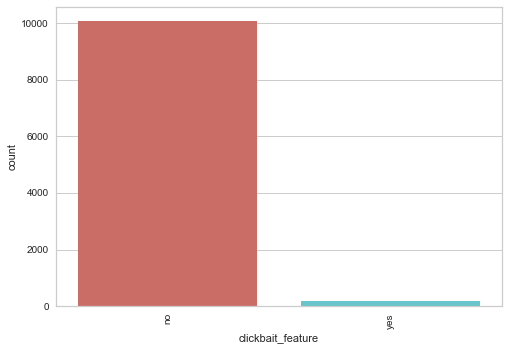

In [131]:
create_distribution(train_news,'clickbait_feature')

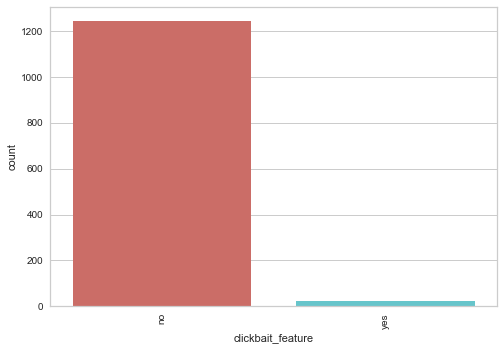

In [132]:
create_distribution(test_news,'clickbait_feature')

### Tagging

Tag Documents against context Train, Test and Valid

In [133]:
#tag train data and run doc2vec model
clickbait_labelled_headlines_train = tag_headline(train_news, processedheadlinecolname, clickbaitfeature)
print(clickbait_labelled_headlines_train[:3])

#tag train data and run doc2vec model
clickbait_labelled_headlines_test = tag_headline(test_news, processedheadlinecolname, clickbaitfeature)
print(clickbait_labelled_headlines_test[:3])

#tag train data and run doc2vec model
clickbait_labelled_headlines_valid = tag_headline(valid_news, processedheadlinecolname, clickbaitfeature)
print(clickbait_labelled_headlines_valid[:3])

[TaggedDocument(words=['says', 'annies', 'list', 'political', 'group', 'supports', 'thirdtrimester', 'abortions', 'demand'], tags=['no']), TaggedDocument(words=['decline', 'coal', 'start', 'started', 'natural', 'took', 'started', 'begin', 'president', 'george', 'bushs', 'administration'], tags=['yes']), TaggedDocument(words=['hillary', 'clinton', 'agrees', 'john', 'mccain', 'voting', 'give', 'george', 'bush', 'benefit', 'doubt', 'iran'], tags=['no'])]
[TaggedDocument(words=['building', 'wall', 'usmexico', 'border', 'take', 'literally', 'years'], tags=['no']), TaggedDocument(words=['wisconsin', 'pace', 'double', 'number', 'layoffs', 'year'], tags=['no']), TaggedDocument(words=['says', 'john', 'mccain', 'done', 'nothing', 'help', 'vets'], tags=['no'])]
[TaggedDocument(words=['less', 'americans', 'working'], tags=['no']), TaggedDocument(words=['obama', 'sworn', 'office', 'holy', 'bible', 'instead', 'kuran', 'their', 'equivalency', 'bible', 'different', 'beliefs'], tags=['no']), TaggedDocu

#### Apply Doc2Vec on Tagged Documents to created doc2vec models
We use doc2vec as we are doing it on a sentence, would have been better to do word2vec if it were a word

In [134]:
doc2vec_model_clickbait_train = Doc2Vec(documents = clickbait_labelled_headlines_train,
                              dm=0, num_features=500, min_count=2, size=21, window=4)
doc2vec_model_clickbait_test= Doc2Vec(documents = clickbait_labelled_headlines_test,
                              dm=0, num_features=500, min_count=2, size=21, window=4)
doc2vec_model_clickbait_valid= Doc2Vec(documents = clickbait_labelled_headlines_valid,
                              dm=0, num_features=500, min_count=2, size=21, window=4)

#### Doc2Vec Model to Vector converter
Create function to apply as lambda to convert text, doc2vecmodel to vector

In [135]:
def create_docvector(doc2vec_model,label):
    return doc2vec_model.docvecs[label]

#### Add vector for every text in the dataset

In [136]:
def apply_clickbait_doc2vec(dflocal,doc2vec_model, vectorcolname, label):
    dflocal[vectorcolname] = dflocal.apply(
        lambda row: create_docvector(doc2vec_model,str(row[label])), axis=1)
    return dflocal

#### Update Dataset with vectors identified by Doc2Vec applied on context

In [137]:
clickbaitdoc2veccolumn = 'clickbait_doc2vec_vector'
train_news = apply_clickbait_doc2vec(train_news, doc2vec_model_clickbait_train,clickbaitdoc2veccolumn,'clickbait_feature')
train_news.head()

test_news = apply_clickbait_doc2vec(test_news, doc2vec_model_clickbait_test,clickbaitdoc2veccolumn,'clickbait_feature')
test_news.head()

valid_news = apply_clickbait_doc2vec(valid_news, doc2vec_model_clickbait_valid,clickbaitdoc2veccolumn,'clickbait_feature')
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,context_lda_topic_topwords,context_lda_topic_name,content_doc2vec_vector,contextfeaturevector,question,exclamation,caps_ratio,length_of_text,clickbait_feature,clickbait_doc2vec_vector
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,...,jobs president says million obama barack creat...,presidential_debate,"[-0.23797712, 0.55482185, -0.74135077, -0.0164...","[-0.23797711730003357, 0.5548218488693237, -0....",0,0,0.400000,51,no,"[0.48550278, 1.1968606, -1.130334, -0.23570676..."
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,...,says percent every state health year security ...,public_comments,"[-0.169468, 0.6540211, -0.8739169, -0.047774, ...","[-0.1694680005311966, 0.6540210843086243, -0.8...",0,0,0.812500,148,no,"[0.48550278, 1.1968606, -1.130334, -0.23570676..."
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,...,would since state says office million percent ...,book_newsletter,"[-0.14645325, 0.4851716, -0.5840696, -0.013874...","[-0.14645324647426605, 0.4851715862751007, -0....",0,0,0.111111,204,no,"[0.48550278, 1.1968606, -1.130334, -0.23570676..."
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,...,says percent every state health year security ...,public_comments,"[-0.169468, 0.6540211, -0.8739169, -0.047774, ...","[-0.1694680005311966, 0.6540210843086243, -0.8...",0,0,0.333333,46,no,"[0.48550278, 1.1968606, -1.130334, -0.23570676..."
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,...,jobs president says million obama barack creat...,presidential_debate,"[-0.23797712, 0.55482185, -0.74135077, -0.0164...","[-0.23797711730003357, 0.5548218488693237, -0....",0,0,0.166667,190,no,"[0.48550278, 1.1968606, -1.130334, -0.23570676..."


In [138]:
create_docvector(doc2vec_model_clickbait_train,train_news['clickbait_feature'][0])

array([ 0.4172205 ,  1.0319412 , -0.97593933, -0.20450792, -0.78986394,
        0.2920943 , -0.7508668 , -1.0013199 , -1.0282164 ,  0.7458115 ,
       -0.7803833 , -0.50361806, -0.88650525, -0.44485357,  0.8176363 ,
       -1.0716813 , -0.68803716,  0.78530204,  1.0938766 ,  1.1925116 ,
        0.856837  ], dtype=float32)

In [139]:
[train_news['headline_lda_topic_score'][0],
           train_news['headline_sentiment_compound'][0],
            create_docvector(doc2vec_model_train,train_news[contexttopicnamecol][0])]

[0.8874626755714417,
 0.25,
 array([ 0.15415175,  1.1714528 , -0.92645097,  0.14692944, -1.2748761 ,
        -1.0029851 , -0.17938344,  1.100297  , -1.0022368 ,  0.46520415,
        -1.2214063 ,  1.4889724 , -0.6306713 ,  1.1156805 , -1.303894  ,
        -0.33428285,  1.1854404 ,  1.0606472 ,  0.94075304,  1.2289617 ,
         1.400582  ], dtype=float32)]

In [140]:
def getclickbaitfeaturetrainvector():
    sentiment = train_news.headline_sentiment_compound.reset_index()['headline_sentiment_compound']
    topic = train_news.headline_lda_topic_score.reset_index()['headline_lda_topic_score']
    clickbait_doc2vec = []
    for i in range(len(train_news['clickbait_feature'])):
        clickbait_value = train_news['clickbait_feature'][i]
        clickbait = doc2vec_model_clickbait_train[clickbait_value]
        clickbait_doc2vec.append(clickbait)
    
    clickbait_vector = pd.concat([sentiment,topic, pd.DataFrame(clickbait_doc2vec)],axis=1)
    return clickbait_vector

In [141]:
def getclickbaitfeaturetestvector():
    sentiment = test_news.headline_sentiment_compound.reset_index()['headline_sentiment_compound']
    topic = test_news.headline_lda_topic_score.reset_index()['headline_lda_topic_score']
    clickbait_doc2vec = []
    for i in range(len(test_news['clickbait_feature'])):
        clickbait_value = test_news['clickbait_feature'][i]
        clickbait = doc2vec_model_clickbait_test[clickbait_value]
        clickbait_doc2vec.append(clickbait)
    
    clickbait_vector = pd.concat([sentiment,topic, pd.DataFrame(clickbait_doc2vec)],axis=1)
    return clickbait_vector

In [142]:
clickbait_vector = getclickbaitfeaturetrainvector()

In [143]:
clickbait_vector_test = getclickbaitfeaturetestvector()

In [144]:
#Get train and test data for classification
X_train = clickbait_vector
y_train = train_news['encoded_label']

X_test = clickbait_vector_test
y_test = test_news['encoded_label']

In [145]:
#perform vector classification using SVM
from sklearn.svm import SVC
fake_news_svm_classifier = SVC(kernel = 'linear', random_state = 42)
model = fake_news_svm_classifier.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [146]:
#perform vector classification using Logistic Regression
from sklearn.linear_model import  LogisticRegression
fake_news_classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
fake_news_classifier.fit(X_train, y_train)
y_pred = fake_news_classifier.predict(X_test)
estimate_score(y_test, y_pred)

accuracy: 56.432517758484614
precision: [0.6        0.56418384]
recall: [0.00542495 0.99719888]
fscore: [0.01075269 0.72064777]
support: [553 714]


In [147]:
#Method to calculate model accuracy, precision
#Method to calculate model accuracy, precision
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def estimate_score(y_test, y_pred):
    score(y_test, y_pred, average='macro')
    precision, recall, fscore, support = score(y_test, y_pred)
    
    print('accuracy: {}'.format(accuracy_score(y_test,y_pred)*100))
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))

In [148]:
estimate_score(y_test, y_pred)

accuracy: 56.432517758484614
precision: [0.6        0.56418384]
recall: [0.00542495 0.99719888]
fscore: [0.01075269 0.72064777]
support: [553 714]


In [149]:
def write_to_csv(df, vector_data, filename):
    feature = []
    for index,row in vector_data.iterrows():
        feature.append(row.tolist())
    
    final_feature = []
    for i in range(len(df)):
        data = {}
        headline = df['headline_text'][i]
        encoded_label = df['encoded_label'][i]
        clickbait_vector = feature[i]
        data = {'headline_text':headline, 'encoded_label':encoded_label, 'clickbait_vector':clickbait_vector}
        final_feature.append(data)

    df = pd.DataFrame(final_feature)
    df.to_csv(filename, sep=',')

In [150]:
write_to_csv(train_news, X_train,"enriched_data/train_clickbaitfeature.csv" )

In [151]:
write_to_csv(test_news, X_test,"enriched_data/test_clickbaitfeature.csv" )

### Spam Score based Featured Extraction

In [156]:
#load the spam dictionary
spam_dict = pd.read_csv('input_data/spam_dict.csv', sep=",", header=None, names=['spamword'])
spam_dict = spam_dict.fillna(0)
spam_dict = spam_dict.drop_duplicates()
spam_dict.head(5)

#Count vector for train data
from sklearn.feature_extraction.text import CountVectorizer
spamcountV = CountVectorizer(vocabulary=list(set(spam_dict['spamword'])))
train_count = spamcountV.fit_transform(train_news['headline_text'])

In [157]:
nb_pipeline_spam = Pipeline([
        ('NBCV',spamcountV),
        ('nb_clf',MultinomialNB())])

nb_pipeline_spam.fit(train_news[headlinecolname],train_news[labelcolname])
predicted_spam_nb = nb_pipeline_spam.predict(test_news[headlinecolname])
np.mean(predicted_spam_nb == test_news[labelcolname])

0.56353591160221

Total statements classified:10240
Score:0.7193132307048596
Score length:5


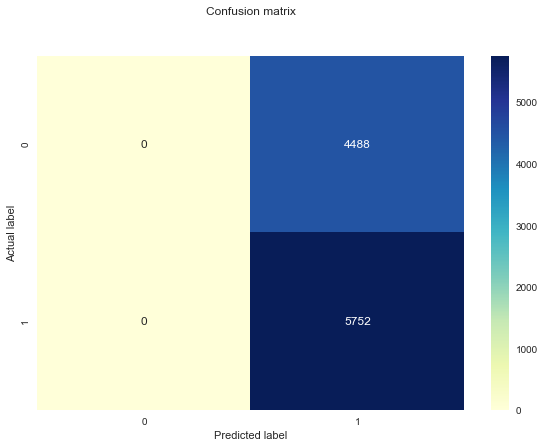

In [158]:
build_confusion_matrix(nb_pipeline_spam)